In [1]:
from google.colab import drive
print("Drive mounting: ",end="")
drive.mount('/content/drive', force_remount=True)

import shutil
filename = "/content/drive/My Drive/labelled_images.zip"
extract_dir = "/content/main_input"
print(f'Unzipping file "{filename}" to "{extract_dir}"')
shutil.unpack_archive(filename, extract_dir)

Drive mounting: Mounted at /content/drive
Unzipping file "/content/drive/My Drive/labelled_images.zip" to "/content/main_input"


In [ ]:
from PIL import Image
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from sklearn.cluster import KMeans

import cv2
from google.colab.patches import cv2_imshow
from os import listdir
import csv

In [ ]:
matrix_data = []
def my_glcm(im_frame,label):
  # image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8) # 'Your_2D_np_array'

  # cv2_imshow(image)

  # Convert image to grayscale
  gray_image = cv2.cvtColor(im_frame, cv2.COLOR_BGR2GRAY)
  # Scale pixel values to range [0, 255]
  image = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)

  # Generate GLCM
  distances =[50] # Offset
  angles = [np.pi/2]  # Vertical Direction
  glcm = graycomatrix(image, distances=distances, angles=angles,levels=256)

  # Calculate Features from GLCM
  contrast = graycoprops(glcm, 'contrast')
  dissimilarity = graycoprops(glcm, 'dissimilarity')
  homogeneity = graycoprops(glcm, 'homogeneity')
  energy = graycoprops(glcm, 'energy')
  correlation = graycoprops(glcm, 'correlation')
  matrix_data.append([label,contrast[0][0],dissimilarity[0][0],homogeneity[0][0],energy[0][0],correlation[0][0]])
  # print(f'contrast={contrast} dissimilarity={dissimilarity} homogeneity={homogeneity} energy={energy} correlation={correlation}')

In [ ]:
# im_frame = Image.open('/content/drive/MyDrive/input/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')
# image1 = cv2.imread('/content/drive/MyDrive/input/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')
# cv2_imshow(image1)

# image2 = cv2.imread('/content/drive/MyDrive/input/PlantVillage/Potato___Late_blight/0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG')
# cv2_imshow(image2)

# my_glcm(image1)
# my_glcm(image2)

directory_root = '/content/main_input/labelled_images'

image_list, label_list = [], []
try:
    root_dir = listdir(directory_root)
    for folder in root_dir:
      label = listdir(f"{directory_root}/{folder}")
      image_directory = listdir(f"{directory_root}/{folder}/{label[0]}")
      if len(image_directory)>=1000:
        print(label[0], len(image_directory))
        for image in image_directory[:1000]:
          img_path = f"{directory_root}/{folder}/{label[0]}/{image}"
          image = cv2.imread(img_path)
          my_glcm(image,label[0])
          label_list.append(label[0])
except Exception as e:
    print(f"Error : {e}")

print(matrix_data)
print(len(label_list)//1000)
no_of_diseases = len(label_list)//1000

Ileocecal valve 4189
Pylorus 1529
Reduced mucosal view 2906
Normal clean mucosa 34338
[['Ileocecal valve', 1141.349619130869, 18.530979437229437, 0.08874918005007167, 0.026098013149295593, 0.20293949289719027], ['Ileocecal valve', 1622.2920725108227, 23.286140942390944, 0.1005369346286719, 0.03064138882601304, 0.46308721527457447], ['Ileocecal valve', 3053.0808878621374, 35.40685356310356, 0.05372910082619356, 0.01764025359809831, 0.6053890191372591], ['Ileocecal valve', 2479.956918081918, 33.796828171828174, 0.038444608549247236, 0.011491772408056355, 0.20189236712698688], ['Ileocecal valve', 1263.5614385614385, 20.770646020646023, 0.07096859991146079, 0.022356614750685216, 0.146441220694154], ['Ileocecal valve', 1594.669850982351, 24.3254662004662, 0.05860249196159832, 0.016505864282817077, 0.1537756357702462], ['Ileocecal valve', 2494.4503725441227, 33.481133449883444, 0.04613412813828304, 0.018974673752906877, 0.4751043808071873], ['Ileocecal valve', 1306.4362408424909, 20.11504120

In [ ]:
csv_filename = 'data.csv'

# Write data to CSV file
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write each sublist as a row in the CSV file
    writer.writerows(matrix_data)

print("CSV file created successfully:", csv_filename)


CSV file created successfully: data.csv


In [ ]:
# Load data from the CSV file
csv_filename = 'data.csv'  # Specify the filename of your CSV file
data = []
with open(csv_filename, mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)

# Convert data to numpy array
data_array = np.array(data)

# Extract features (columns 1 to 5) for clustering
X = data_array[:, 1:].astype(float)

# Perform k-means clustering with k=2 (you can adjust k as needed)
kmeans = KMeans(n_clusters=no_of_diseases, random_state=42)
kmeans.fit(X)

# Add cluster labels to the original data
data_with_clusters = np.column_stack((data_array, kmeans.labels_))

# Specify the filename for the CSV file with cluster labels
clustered_csv_filename = 'clustered_data.csv'

# Write data with cluster labels to CSV file
with open(clustered_csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write each row (data + cluster label) to the CSV file
    writer.writerows(data_with_clusters)

print("CSV file with cluster labels created successfully:", clustered_csv_filename)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CSV file with cluster labels created successfully: clustered_data.csv


In [ ]:
# Define the new row data
new_row = ['label','contrast', 'dissimilarity', 'homogeneity','energy','correlation','class']

# Open the existing CSV file in read mode
with open('clustered_data.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    rows = list(reader)  # Read all rows into a list

# Insert the new row at the beginning
rows.insert(0, new_row)

# Write the updated content to a new CSV file
with open('updated_file.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

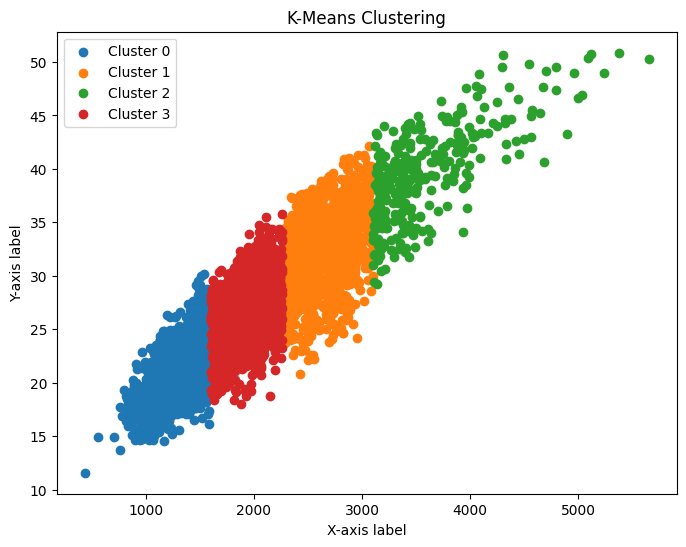

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv("updated_file.csv")

# Assuming your CSV file has columns for x, y coordinates and a column for cluster numbers
x = data['contrast']
y = data['dissimilarity']
clusters = data['class']

# Plot each cluster with a different color
plt.figure(figsize=(8, 6))
for cluster_num in sorted(clusters.unique()):
    cluster_data = data[clusters == cluster_num]
    plt.scatter(cluster_data['contrast'], cluster_data['dissimilarity'], label=f'Cluster {cluster_num}')

plt.title('K-Means Clustering')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.legend()
plt.show()